In [2]:
import pandas as pd
import seaborn as sns

In [3]:
#Carregando base de dados
df = pd.read_excel('201710_EmissaoPassagens_SCDP.xlsx', skiprows=3, skip_footer=3, encoding='latin1')
#Expondo dos dados importados
df.head()

,Código do órgão superior,Nome do órgão superior,Código do órgão solicitante da viagem,Nome do órgão solicitante da viagem,N. PCDP,N. Reserva/Localizador,Data Emissão Bilhete,Data Embarque,Valor Tarifa Comercial,Percentual Desconto Aplicado,...,Companhia Aérea,Classe Tarifária Bilhete,Regra Tarifária,No Show,Remarcado,Cancelado,Valor Multas,Valor Reembolso,Diferença de Tarifa,Situação Final Bilhete
0,3,Fundação Instituto Brasileiro de Geografia e ...,3,Fundação Instituto Brasileiro de Geografia e ...,028012/17,JGZQXC,2017-10-03 11:33:35.808,2017-10-06 20:55:00,407.4,0.0,...,LATAM AIRLINES BRASIL,N,http://t.umail.com.br/ClickHere/ViewEmail.asp...,Não,Não,Não,0.0,0.0,0.0,Voado
1,3,Fundação Instituto Brasileiro de Geografia e ...,3,Fundação Instituto Brasileiro de Geografia e ...,028012/17,JHH5FW,2017-10-03 11:33:37.149,2017-10-04 15:00:00,229.0,3.0,...,AVIANCA S.A.,Z,https://www.avianca.com.br/regras-de-tarifas ...,Não,Não,Não,0.0,0.0,0.0,Voado
2,3,Fundação Instituto Brasileiro de Geografia e ...,3,Fundação Instituto Brasileiro de Geografia e ...,030294/17,GIKVKJ,2017-10-16 16:12:52.327,2017-10-26 11:40:00,1111.9,0.0,...,GOL Linhas Aéreas Inteligentes,J,https://www.voegol.com.br/pt/informacoes/tari...,Não,Não,Não,0.0,0.0,0.0,Andamento
3,3,Fundação Instituto Brasileiro de Geografia e ...,3,Fundação Instituto Brasileiro de Geografia e ...,030294/17,HMHR3K,2017-10-16 16:12:58.196,2017-10-23 11:15:00,1015.9,0.0,...,GOL Linhas Aéreas Inteligentes,W,https://www.voegol.com.br/pt/informacoes/tari...,Não,Não,Não,0.0,0.0,0.0,Voado
4,3,Fundação Instituto Brasileiro de Geografia e ...,3,Fundação Instituto Brasileiro de Geografia e ...,032694/17,LQF4YR,2017-10-31 13:36:19.009,2017-11-20 18:35:00,185.9,3.0,...,GOL Linhas Aéreas Inteligentes,U,https://www.voegol.com.br/pt/informacoes/tari...,Não,Não,Não,0.0,0.0,0.0,Andamento


In [4]:
# Removendo espaços do nome das colunas
df.columns = df.columns.str.strip()

In [5]:
df.dtypes

Código do órgão superior                   int64
Nome do órgão superior                    object
Código do órgão solicitante da viagem      int64
Nome do órgão solicitante da viagem       object
N. PCDP                                   object
N. Reserva/Localizador                    object
Data Emissão Bilhete                      object
Data Embarque                             object
Valor Tarifa Comercial                   float64
Percentual Desconto Aplicado             float64
Valor Tarifa Governo                     float64
Valor Tarifa Embarque                    float64
Valor Bilhete                            float64
Companhia Aérea                           object
Classe Tarifária Bilhete                  object
Regra Tarifária                           object
No Show                                   object
Remarcado                                 object
Cancelado                                 object
Valor Multas                             float64
Valor Reembolso     

In [6]:
#Criando nova coluna para facilitar calculos
df['count'] = 1

In [7]:
# Quantidade de passagens solicitadas, dividido por Nome do órgão superior
df.groupby('Nome do órgão superior')['count'].sum()

Nome do órgão superior
 Advocacia-Geral da União                                                                 532
 Agência Nacional de Aviação Civil                                                       1005
 Agência Nacional de Energia Elétrica                                                     156
 Agência Nacional de Saúde Suplementar                                                    192
 Agência Nacional de Telecomunicações                                                     250
 Agência Nacional de Transportes Aquaviários                                               80
 Agência Nacional de Transportes Terrestres                                               312
 Agência Nacional de Vigilância Sanitária                                                 542
 Agência Nacional do Cinema                                                                80
 Agência Nacional do Petróleo, Gás Natural e Biocombustíveis                              301
 Caixa de Financiamento Imobiliário d

In [8]:
# Quantidade de solicitações de passagem
df['count'].sum()

50405

In [9]:
# Órgãos que solicitaram as viagens
df['Nome do órgão solicitante da viagem'].unique()

array([' Fundação Instituto Brasileiro de Geografia e Estatística                                                       ',
       ' Diretoria de Informática                                                                                       ',
       ' Diretoria de Geociências                                                                                       ',
       ...,
       ' Secretaria-Geral da Presidência da República                                                                   ',
       ' Secretaria Especial de Assuntos Estratégicos                                                                   ',
       ' Diretoria de Recursos Logísticos                                                                               '],
      dtype=object)

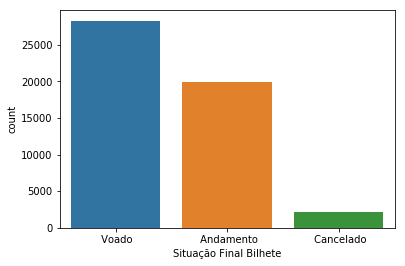

In [10]:
# Gráfico com quantidade de vôos separados por Situação funal do Bilhete
sns.countplot(x='Situação Final Bilhete', data=df)

In [11]:
# Quantidade de vôos dividido por companhia aérea
df.groupby('Companhia Aérea')['count'].sum()

Companhia Aérea
 AVIANCA S.A.                              9028
 AZUL LINHAS AÉREAS BRASILEIRA            10967
 GOL Linhas Aéreas Inteligentes           17568
 Gol OU Latam - Parceria com Terceiro       267
 LATAM AIRLINES BRASIL                    12301
 MAP TRANSPORTES AEREOS LTDA - MAP          274
Name: count, dtype: int64

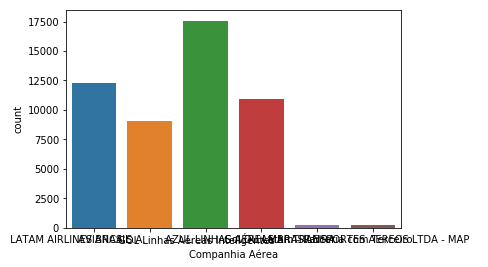

In [12]:
# Gráfico com Quantidade de vôos dividido por companhia aérea
sns.countplot(x='Companhia Aérea', data=df)

In [14]:
# Média dos valores de tarifa comercial
df['Valor Tarifa Comercial'].mean()

678.2732582082239

In [15]:
# Maior e menor valor pago nas passagens, respectivamente
print(df['Valor Tarifa Comercial'].max())
print(df['Valor Tarifa Comercial'].min())

4156.8
0.0


In [24]:
# Valores máximo e mínimo do percentual de desconto das passagens, respectivamente
print(df['Percentual Desconto Aplicado'].max())
print(df['Percentual Desconto Aplicado'].min())

100.0
-6.64


In [49]:
# Valor pago em multas seguido da quantidade de multas
print(df['Valor Multas'].sum())
multas = df[df['Valor Multas'] > 0]
print(multas['count'].sum())

2249.14
14


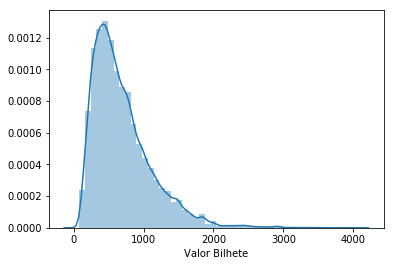

In [50]:
# Histobrama dos valores pagos nos bilhetes
sns.distplot(df['Valor Bilhete'])

In [61]:
# Valor médio do bilhete, agrupado por companhia aérea
df.groupby('Companhia Aérea')['Valor Bilhete'].mean()

Companhia Aérea
 AVIANCA S.A.                             580.997634
 AZUL LINHAS AÉREAS BRASILEIRA            731.293923
 GOL Linhas Aéreas Inteligentes           736.373500
 Gol OU Latam - Parceria com Terceiro     608.689813
 LATAM AIRLINES BRASIL                    687.548436
 MAP TRANSPORTES AEREOS LTDA - MAP        737.946022
Name: Valor Bilhete, dtype: float64

In [68]:
# Valor acumulado com a soma do desconto de todas as passagens.
df['des_acumulado'] = df['Valor Bilhete']*(df['Percentual Desconto Aplicado'] / 100)
df['des_acumulado'].sum()

677843.437311

In [69]:
# Total gasto com bilhetes
df['Valor Bilhete'].sum()

35024207.44

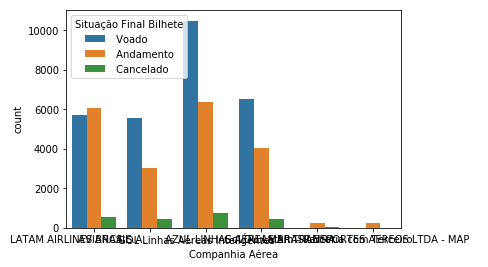

In [66]:
# situação final do bilhete agrupado por companhia aérea
sns.countplot(x='Companhia Aérea', hue='Situação Final Bilhete', data=df)

In [72]:
# Valor total em multas
df['Valor Multas'].sum()

2249.14